# 【Prager法による木製桁の強度計算図表】　 藤田　輝昭
（防衛大学校理工学研究報告　第5巻第1号 昭和42年6月）

In [1]:
#ライブラリインポート
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
import matplotlib.font_manager 
#import pandas as pd

prop = matplotlib.font_manager.FontProperties(fname=r'C:\Windows\Fonts\meiryo.ttc', size=12)

%matplotlib inline
#%matplotlib notebook

In [2]:
#ファイル読み込み
U = np.loadtxt('u.csv' , delimiter=',')
L = np.loadtxt('l.csv' , delimiter=',')
A = np.loadtxt('a.csv' , delimiter=',')
M = np.genfromtxt('m.csv' , delimiter=',')

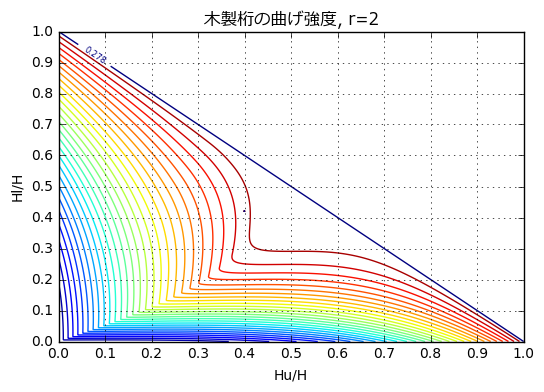

In [3]:
#等曲げ曲線の表示

#CS= plt.contour(U, L, M, levels=[0,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25,0.277777777777777])
CS= plt.contour(U, L, M,linewidth=1,  levels=np.arange(0,0.28,0.01))
CS= plt.contour(U, L, M, linewidth=1, levels=[0.277777777777777])

plt.clabel(CS, inline=1, fontsize=6)

plt.title('木製桁の曲げ強度, r=2', fontproperties=prop,size=12)
plt.xlabel('Hu/H')
plt.ylabel('Hl/H')
plt.grid(True)
plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))


#fig.colorbar(im)
plt.savefig('test.png', dpi=600)
plt.show()

In [4]:
#Nanを0に置き換える
index = np.where(M != M) # check if NaN

for i in range(len(index[0])):
    M[index[0][i]][index[1][i]] = 0.

In [5]:
f = interpolate.interp2d(U[0,:], L[:,0], M, kind='linear')

In [6]:
f(0.3,0.6)

array([ 0.25499994])

In [7]:
#最小フランジ厚みデータ読み込み

p = np.genfromtxt('hu_hl-m -org.csv' , delimiter=',')

m0 = np.array(p[:,0]) #曲げ強度
u0 = np.array(p[:,1]) #最小フランジ厚み（上側）
l0 = np.array(p[:,2]) #最小フランジ厚み（下側）

ms = 0.277777777777777 #曲げ強度（ソリッド）

<function matplotlib.pyplot.show>

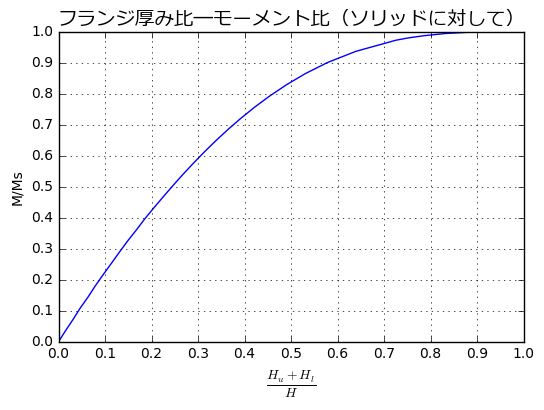

In [8]:
#「フランジ厚み比―モーメント比」グラフ表示
plt.title(u'フランジ厚み比―モーメント比（ソリッドに対して）', size="14", fontproperties=prop)
plt.xlabel(r"$\frac{H_u+H_l}{H}$", fontsize='14')
plt.ylabel('M/Ms')
plt.grid(True)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))

plt.plot(u0+l0,m0/ms)
plt.show

In [9]:
#fit曲線
#最小上フランジ厚み
u1 = np.polyfit(m0[:25], u0[:25], 3)
min_u=np.poly1d(u1)

#最小下フランジ厚み
l1 = np.polyfit(m0[:25], l0[:25], 3)
min_l=np.poly1d(l1)


In [10]:
print(min_u)

      3          2
6.19 x - 0.3589 x + 1.07 x - 0.000776


In [11]:
print(min_l)

       3         2
10.95 x - 1.794 x + 0.658 x - 0.001486


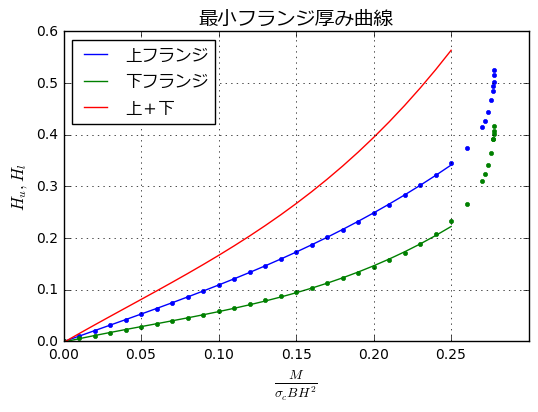

In [12]:
#グラフ描画
m=np.arange(0.,.26,.01)

#上フランジ
plt.plot(m,min_u(m), label='上フランジ')
plt.plot(m0,u0,'b.')

#下フランジ
plt.plot(m,min_l(m), label='下フランジ')
plt.plot(m0,l0,'g.')

#上フランジ＋下フランジ
plt.plot(m,min_u(m)+min_l(m), label='上＋下')

plt.title(u'最小フランジ厚み曲線', size="14", fontproperties=prop)
plt.ylabel(r"$H_u ,H_l$", fontsize='12')
plt.xlabel(r'$\frac{M}{\sigma_c B H^2}$',fontsize="14")
plt.grid(True)
plt.xlim(0,.3)
plt.ylim(0,.6)
plt.xticks(np.arange(0,0.3,0.05))
plt.yticks(np.arange(0,.7,0.1))

plt.legend(loc='upper left', prop=prop)

plt.show()